<a href="https://colab.research.google.com/github/youngduck98/water_pollution_prediction/blob/main/15w_ai_reporter_sum_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 환경설정

In [ ]:
from google.colab import drive
import os, sys
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 12.5 MB 428 kB/s 
     |████████████████████████████████| 272.0 MB 10 kB/s 
     |████████████████████████████████| 4.0 MB 51.0 MB/s 


In [ ]:
from __future__ import print_function
import os

from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

from sklearnex import patch_sklearn
patch_sklearn()

ImportError: ignored

#2. data 연결 및 data 분석

In [ ]:
import pandas as pd
import numpy as np
data_path = ['/content/gdrive/MyDrive/15week_ai/']
filepath = os.sep.join(data_path + ['water_potability.csv'])
data = pd.read_csv(filepath, sep=',')

##data head

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##data type

In [ ]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

##data size

In [ ]:
len(data)

3276

##data간 편차 및 분포

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


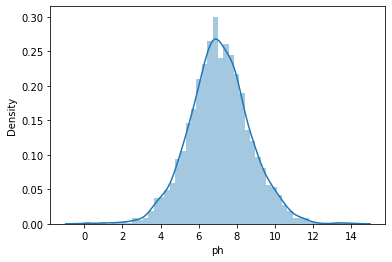

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['ph'], label = 'ph');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


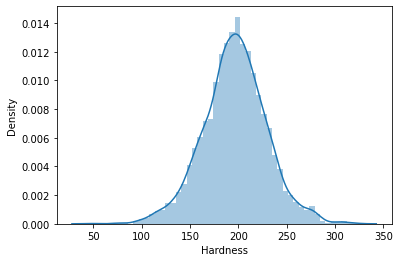

In [ ]:
sns.distplot(data['Hardness'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


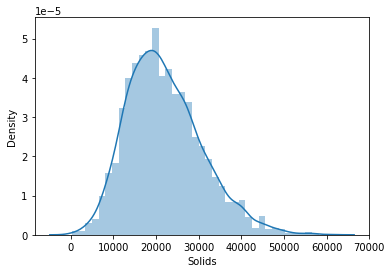

In [ ]:
sns.distplot(data['Solids'])

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


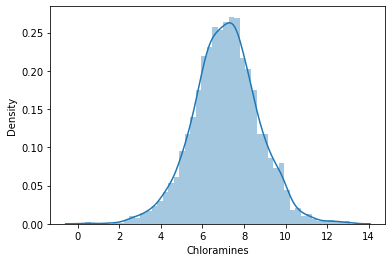

In [ ]:
sns.distplot(data['Chloramines'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


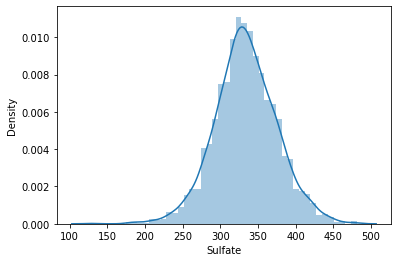

In [ ]:
sns.distplot(data['Sulfate'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


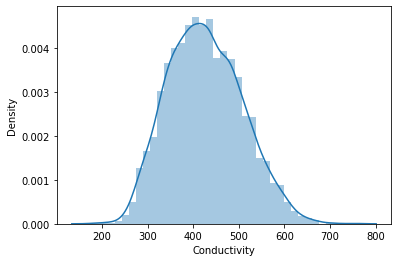

In [ ]:
sns.distplot(data['Conductivity'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


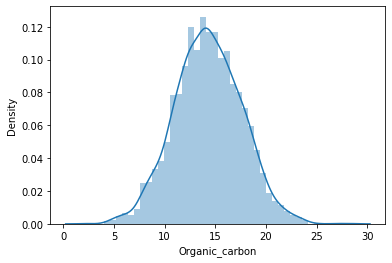

In [ ]:
sns.distplot(data['Organic_carbon'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


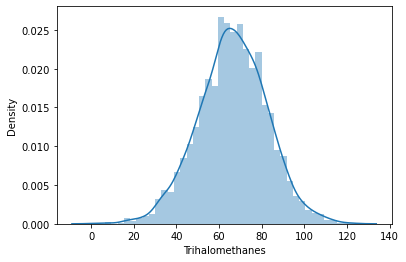

In [ ]:
sns.distplot(data['Trihalomethanes'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


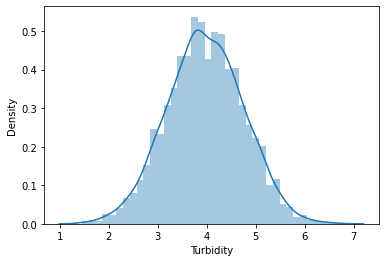

In [ ]:
sns.distplot(data['Turbidity'])

In [ ]:
data['Potability'].value_counts(normalize=True).sort_index()

0    0.60989
1    0.39011
Name: Potability, dtype: float64

각 feature들은 Solids를 제외하고는 대부분 정규분포를 띄고 있으며 solids역시 이를 크게 벗어나지는 않는다.

에상하려는 값인 potability는 마실 수 없는 것물과 마실 수 있는 물간의 관계가 6:4 정도로 정확하게 5:5는 아니지만 결과값에 크게 영향을 미치진 않을 것으로 생각된다.

## 결측치 분석

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

ph, sulfate, trihalomethanes에서 결측값이 관측되며 결측률은 약14%, 23%, 4% 정도이다

##각 특성과 data 결과값 ('Potability')의 관계

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

In [ ]:
print(data.corr(method='pearson')["Potability"])

ph                -0.003556
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.023577
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.007130
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64


각 특성 하나 하나는 결과와는 크게 상관이 없다.

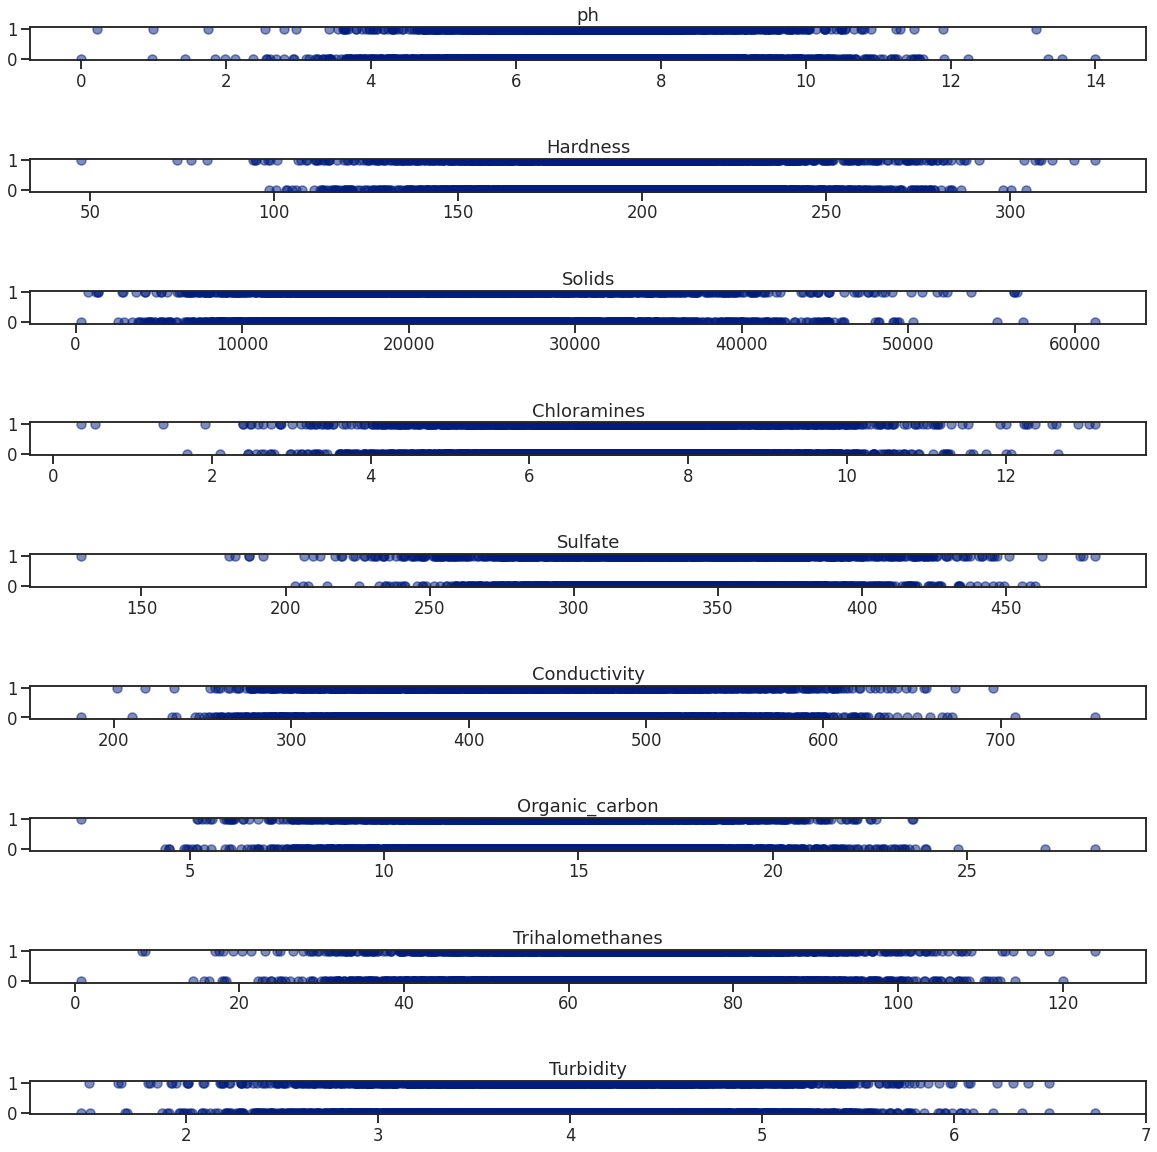

In [ ]:
i = 0;
fig, axes = plt.subplots(len(data[0:].columns.tolist())-1, 1)

# 격자 크기 설정
fig.set_size_inches((20, 20))

# 격자 여백 설정
plt.subplots_adjust(hspace = 3)

for x in data[0:].columns.tolist():
  if(x != 'Potability'):
    axes[i].set_title(x)
    axes[i].scatter(data[x], data['Potability'], alpha=.5)
    i+=1
plt.show()

하나의 특징으로 결과값을 예측하는 것은 불가능함을 알 수 있다.

#3. 해당 data상에서의 각 알고리즘 장 단점

##k-NN

###장점

1.  가장 가까운 상위 k개의 데이터만 계산하기 때문에, outlier의 영향을 적게 받는다.

###단점

1. 모델을 생성하지 않으므로 feature과 class간 관계를 파악하기 어렵다

###유의할 점

1. 적절한 K값을 찾아야한다.


##NB

###장점

1. 현재 data를 보면 sulfate feature의 경우 약 25%정도의 결측치를 보이고 있다. naive bayes의 경우 이러한 누락이나 이상치에 대해 강점을 가지고 있다.

###단점

1. 모든 특징이 독립이라는 가정이 잘못된 경우가 있다. 해당 data를 보았을 때 ph의 경우 Trihalomethanes와 연관관계가 있을 것으로 고려되나 이러한 점들이 고려되지 않아 정확도가 떨어질 수 있다.

###유의할 점

1. 선택하는 feature에 따라 영향을 많이 받기 때문에 적절하지 않은 feature을 선택할 경우 정확도가 크게 하락할 수 있다.

##svm: 수정 필요

###장점

1. C의 값이 작을 경우 overfitting을 낮출 수 있다.


2. 데이터가 정규분포를 따르지 않아도 사용 가능하다.

###단점

###유의할 점

##decision_tree

###장점

1. dt는 범주형 data와 연속적 data 모두에서 사용이 가능 하므로 해당 data의 큰 변형 없이 사용이 가능하다. data 변형으로 인한 영향을 덜 고려해도 된다는 점에서 장점이 있다.

###단점

1. data들이 전체적으로 결과와의 상관관계가 매우 미약하여 각 특성들의 중요도가 명확하게 갈리지 않고 이에 따라 애매한 분류가 많아질 가능성이 있다. 이는 경계선 근방의 자료 값에 대해 잘 예측하지 못하는 dt의 특성상 정확도가 높지 않을 수도 있다는 것을 암시한다

###유의할 점

1. overfitting: 훈련된 data에서만 잘 맞는 것을 방지하기 위해 tree의 크기를 적절하게 조절할 방법을 찾아야 한다

2. feature's order: feature 순서의 영향을 많이 받기 때문에 최적의 feature 순서를 찾아야 한다.

#4. 데이터 전처리

##결측치 처리

In [ ]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

##train/test data 분리

In [ ]:
feature_cols = [x for x in data.columns if x not in 'Potability']

###결측치 평균 처리

In [ ]:
# Split the data into two parts with 1000 points in the test data
# This creates a generator

strat_shuff_split = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['Potability']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Potability']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Potability']

train/test 비율이 공정하게 나뉘었는지 확인

In [ ]:
y_train.value_counts(normalize=True).sort_index()

0    0.609924
1    0.390076
Name: Potability, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

0    0.609756
1    0.390244
Name: Potability, dtype: float64

##standard scaler 적용

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# 5. 각 알고리즘 학습

In [ ]:
acurracy_list = list()

## 5-1 Nb 학습

In [ ]:
data_NB = data
float_columns = [x for x in data.columns if x not in ['Potability']]
data_NB[float_columns] = std_scaler.fit_transform(data_NB[float_columns])

데이터의 분포를 알아보기 위해 plot

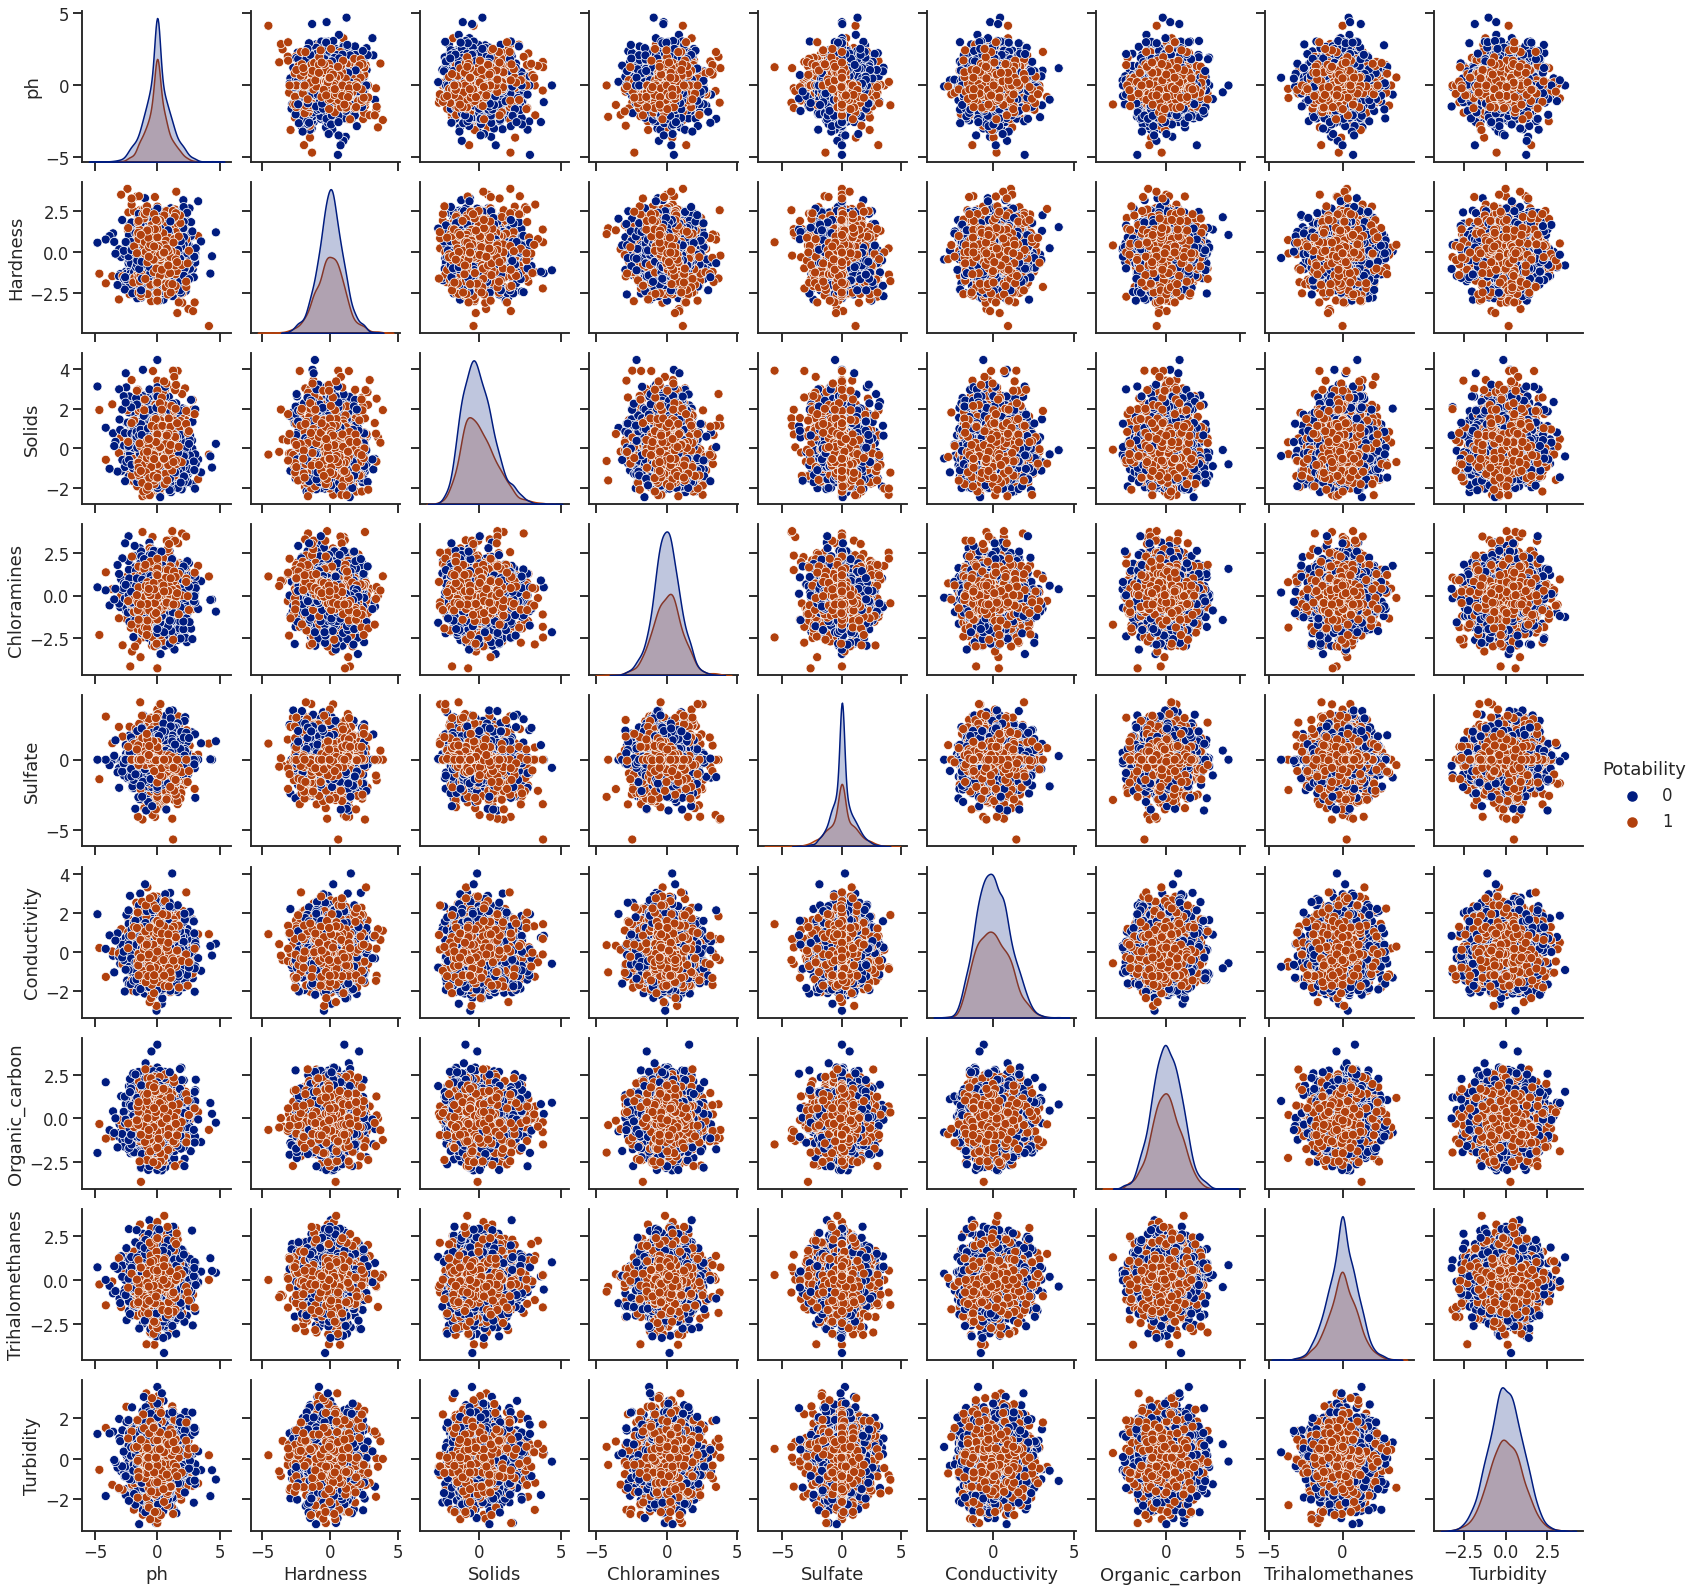

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data_NB, hue='Potability')

data의 전체 column 사용

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
cv_N = 4

X_NB = data_NB[data_NB.columns[:-1]]
y_NB = data_NB.Potability
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores_evg = {}
for key, model in nb.items():
    s_evg = cross_val_score(model, X_NB, y_NB, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores_evg[key] = np.mean(s_evg)
scores_evg

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 863, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/vali

{'gaussian': 0.6077533577533577,
 'bernoulli': 0.6098901098901099,
 'multinomial': nan}

데이터의 분포가 가장 잘 나누어져 있는 Hardness, Chloramines column을 사용

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
cv_N = 4

X_NB = data_NB[['Hardness', 'Chloramines']]
y_NB = data_NB.Potability

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

max_score = 0

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_NB, y_NB, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
    if(max_score < np.mean(s)):
        max_score = np.mean(s)
scores

acurracy_list .append(pd.Series({
 'acurracy' : max_score},name='NB'))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 863, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/vali

Hardness copy값을 늘리면서 plot

<ipython-input-33-e9f3d4532494>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['Hardness_copy%s' % i] = X['Hardness']


[Text(0, 0.5, 'average accuracy score'),
 Text(0.5, 0, 'number of extra copies of "Hardness"'),
 Text(0.5, 1.0, 'Decline in Naive Bayes performance(GaussianNB)')]

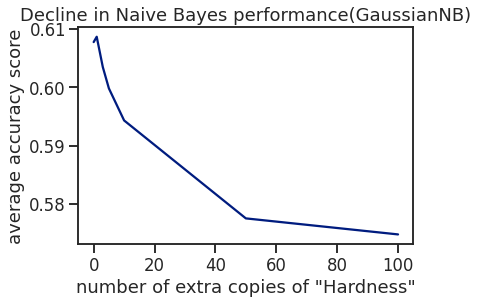

In [ ]:
X_NB = data_NB[data_NB.columns[:-1]]
y_NB = data_NB.Potability

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_Hardness(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['Hardness_copy%s' % i] = X['Hardness']
    return X_new


def get_cross_val_score_GNB(n):
    X_new = create_copies_Hardness(X_NB, n)
    scores_GNB = cross_val_score(GaussianNB(), X_new, y_NB, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores_GNB)


avg_scores_GNB = pd.Series(
    [get_cross_val_score_GNB(n) for n in n_copies],
    index=n_copies)

ax_GNB = avg_scores_GNB.plot()
ax_GNB.set(
    xlabel='number of extra copies of "Hardness"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance(GaussianNB)')

<ipython-input-34-070ba6f4aa5d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['Hardness_copy%s' % i] = X['Hardness']


[Text(0, 0.5, 'average accuracy score'),
 Text(0.5, 0, 'number of extra copies of "Hardness"'),
 Text(0.5, 1.0, 'Decline in Naive Bayes performance(BernoulliNB)')]

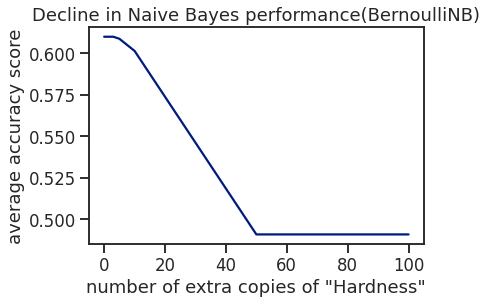

In [ ]:
X_NB = data_NB[data_NB.columns[:-1]]
y_NB = data_NB.Potability

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_Hardness(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['Hardness_copy%s' % i] = X['Hardness']
    return X_new


def get_cross_val_score_BNB(n):
    X_new = create_copies_Hardness(X_NB, n)
    score_BNB = cross_val_score(BernoulliNB(), X_new, y_NB, cv=cv_N, n_jobs=cv_N)
    return np.mean(score_BNB)


avg_scores_BNB = pd.Series(
    [get_cross_val_score_BNB(n) for n in n_copies],
    index=n_copies)

ax_BNB = avg_scores_BNB.plot()
ax_BNB.set(
    xlabel='number of extra copies of "Hardness"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance(BernoulliNB)')

## 5-2 nn 학습

In [ ]:
# 정확도 측정 function

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_list = list()

k_range = 200

k_max = 0
score_max = 0

for k in range(1, k_range):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    score = accuracy(y_test, y_pred)

    if(score_max < score):
        k_max = k
        score_max = score

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [ ]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

결측치 보정 : mean으로 채우기
최적 K : 28
정확도 : 0.6554878048780488


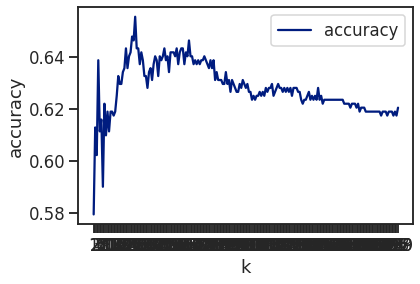

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, k_range));

print("결측치 보정 : mean으로 채우기")
print("최적 K :", k_max)
print("정확도 :", score_max)

acurracy_list .append(pd.Series({
 'acurracy' : score_max},name='NN'))


## 5-4. decision tree 학습

### 5-4-1. 일반적 decision tree 학습

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

만들어진 dt 형태 확인

In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(1075, 34)

measure_error_func

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

prediction

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.603659
precision,1.0,0.491379
recall,1.0,0.445312
f1,1.0,0.467213


In [ ]:
x_cols = [x for x in data.columns if x != 'Potability']
i = 0
max = 0
for x in x_cols:
  print("{}:{}\n".format(x, dt.feature_importances_[i]))
  if(dt.feature_importances_[max] < dt.feature_importances_[i]):
    max = i
  i+=1

print("max: ", x_cols[max],  dt.feature_importances_[max])

ph:0.13926396613475509

Hardness:0.12612023324955168

Solids:0.1283485360526967

Chloramines:0.1248594434460382

Sulfate:0.13293240450117888

Conductivity:0.06780178733644056

Organic_carbon:0.07026831197232641

Trihalomethanes:0.10079551240299991

Turbidity:0.10960980490401255

max:  ph 0.13926396613475509


In [ ]:
sorted_index = sorted(range(len(x_cols)), key=lambda k: -dt.feature_importances_[k]);

for i in sorted_index:
  print(x_cols[i])

ph
Sulfate
Solids
Hardness
Chloramines
Turbidity
Trihalomethanes
Organic_carbon
Conductivity


## 5-4-2. grid search를 활용하여 최적의 decision tree 구하기

In [ ]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

data 형태 확인

In [ ]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(53, 5)

해당 모델로 train, predict

In [ ]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [ ]:
train_test_gr_error

,train,test
accuracy,0.661450,0.623476
precision,0.659574,0.542857
recall,0.272994,0.222656
f1,0.386159,0.315789


해당 모델에서 사용한 feature order 확인, 값이 높을수록 먼저 비교

In [ ]:
x_cols = [x for x in data.columns if x != 'Potability']
i = 0
max = 0
for x in x_cols:
  print("{}:{}\n".format(x, GR.best_estimator_.feature_importances_[i]))
  if(GR.best_estimator_.feature_importances_[max] < GR.best_estimator_.feature_importances_[i]):
    max = i
  i+=1

print("max: ", x_cols[max],  GR.best_estimator_.feature_importances_[max])

ph:0.11840209953025907

Hardness:0.08309074665637066

Solids:0.14858364400036253

Chloramines:0.12328177346361535

Sulfate:0.41520819312094115

Conductivity:0.03064647949006248

Organic_carbon:0.015650378386972325

Trihalomethanes:0.0

Turbidity:0.0651366853514163

max:  Sulfate 0.41520819312094115


In [ ]:
GR_sorted_index = sorted(range(len(x_cols)), key=lambda k: -GR.best_estimator_.feature_importances_[k]);

for i in GR_sorted_index:
  print(x_cols[i])

Sulfate
Solids
Chloramines
ph
Hardness
Turbidity
Conductivity
Organic_carbon
Trihalomethanes


In [ ]:
for i in GR_sorted_index:
  print(x_cols[i], end = ", ")
print()

for i in sorted_index:
  print(x_cols[i],  end = ", ")
print()

Sulfate, Solids, Chloramines, ph, Hardness, Turbidity, Conductivity, Organic_carbon, Trihalomethanes, 
ph, Sulfate, Solids, Hardness, Chloramines, Turbidity, Trihalomethanes, Organic_carbon, Conductivity, 


# 7. 결과 분석

In [ ]:
train_test_gr_error

acurracy_list .append(pd.Series({
 'acurracy' : train_test_gr_error['test'][0]},name='DT'))

In [ ]:
acurracy_list = pd.concat(acurracy_list, axis = 1)

acurracy_list.columns = ["NB", "NN", "DT"]

display(acurracy_list)

,NB,NN,DT
acurracy,0.60989,0.655488,0.623476


처음에 하였던 우려대로 grid search를 사용하여 dt를 개선하였음에도 불구하고  정확도는 60%수준에서 그침을 알 수 있다.